Task 2: Unemployment Analysis with Python

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from datetime import datetime


Load dataset from ZIP

In [2]:
zip_path = "archive (1).zip"   # or give full path if needed
with zipfile.ZipFile(zip_path, 'r') as zf:
    print("Files in ZIP:", zf.namelist())
    # Extract and read both files
    df1 = pd.read_csv(zf.open('Unemployment in India.csv'))
    df2 = pd.read_csv(zf.open('Unemployment_Rate_upto_11_2020.csv'))

# Display few rows to understand structure
print("\n--- Unemployment in India.csv ---")
display(df1.head())
print("\n--- Unemployment_Rate_upto_11_2020.csv ---")
display(df2.head())


Files in ZIP: ['Unemployment in India.csv', 'Unemployment_Rate_upto_11_2020.csv']

--- Unemployment in India.csv ---


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural



--- Unemployment_Rate_upto_11_2020.csv ---


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


Clean and merge data

In [6]:
# Standardize column names
df1.columns = df1.columns.str.strip().str.replace(" ", "_")
df2.columns = df2.columns.str.strip().str.replace(" ", "_")

# Find unemployment column name (some datasets use slightly different naming)
possible_names = [c for c in df1.columns if 'Unemploy' in c]
print("Possible unemployment rate column(s):", possible_names)

# Pick the correct unemployment rate column
rate_col1 = possible_names[0] if possible_names else None
rate_col2 = [c for c in df2.columns if 'Unemploy' in c][0]

# Convert date column (common column names: Date, Date_of_Survey, etc.)
date_col1 = [c for c in df1.columns if 'Date' in c][0]
date_col2 = [c for c in df2.columns if 'Date' in c][0]

df1['Date'] = pd.to_datetime(df1[date_col1], errors='coerce')
df2['Date'] = pd.to_datetime(df2[date_col2], errors='coerce')

# Rename to consistent column names
df1 = df1.rename(columns={rate_col1: 'Unemployment_rate'})
df2 = df2.rename(columns={rate_col2: 'Unemployment_rate'})

# Merge both datasets
combined = pd.concat([df1, df2], ignore_index=True)

# Drop missing or duplicate dates
combined = combined.dropna(subset=['Date', 'Unemployment_rate']).drop_duplicates()

print("✅ Cleaned dataset shape:", combined.shape)
combined.head()


Possible unemployment rate column(s): ['Unemployment_rate']
✅ Cleaned dataset shape: (1007, 10)


,Region,Date,Frequency,Unemployment_rate,Estimated_Employed,Estimated_Labour_Participation_Rate_(%),Area,Region.1,longitude,latitude
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,NaN,NaN,NaN
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,NaN,NaN,NaN
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,NaN,NaN,NaN
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,NaN,NaN,NaN
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,NaN,NaN,NaN


Basic data overview

In [8]:
print("Shape of dataset:", combined.shape)
print("\nColumns:", combined.columns.tolist())
print("\nMissing values:\n", combined.isnull().sum())
print("\nData types:\n", combined.dtypes)

# Basic statistics
combined.describe()


Shape of dataset: (1007, 10)

Columns: ['Region', 'Date', 'Frequency', 'Unemployment_rate', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate_(%)', 'Area', 'Region.1', 'longitude', 'latitude']

Missing values:
 Region                                       0
Date                                         0
Frequency                                    0
Unemployment_rate                            0
Estimated_Employed                           0
Estimated_Labour_Participation_Rate_(%)      0
Area                                       267
Region.1                                   740
longitude                                  740
latitude                                   740
dtype: int64

Data types:
 Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Unemployment_rate                                 float64
Estimated_Employed                                f

,Date,Unemployment_rate,Estimated_Employed,Estimated_Labour_Participation_Rate_(%),longitude,latitude
count,1007,1007.000000,1.007000e+03,1007.000000,267.000000,267.000000
mean,2020-01-31 06:06:04.647467776,11.906991,8.996209e+06,42.378620,22.826048,80.532425
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000,10.850500,71.192400
25%,2019-09-30 00:00:00,4.685000,1.639125e+06,37.835000,18.112400,76.085600
50%,2020-01-31 00:00:00,8.890000,5.543380e+06,40.880000,23.610200,79.019300
75%,2020-05-31 00:00:00,16.125000,1.287115e+07,45.315000,27.278400,85.279900
max,2020-10-31 00:00:00,76.740000,5.943376e+07,72.570000,33.778200,92.937600
std,NaN,10.739549,1.020784e+07,8.048542,6.270731,5.831738


Unemployment trend over time

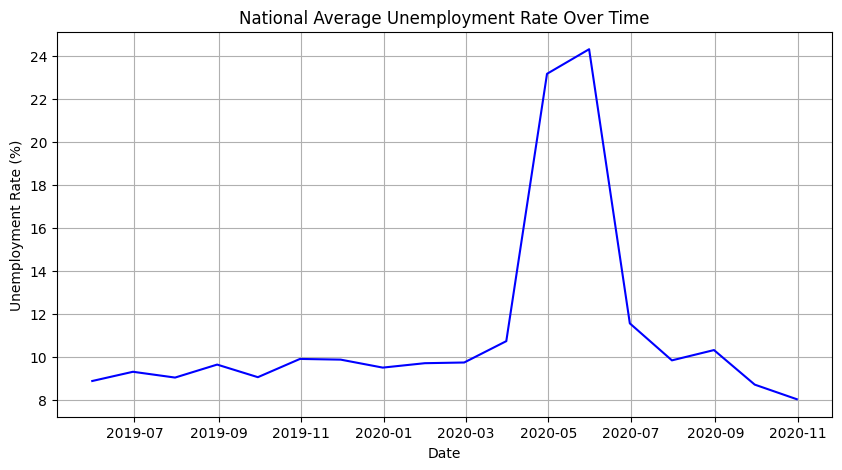

In [9]:
plt.figure(figsize=(10,5))
national_avg = combined.groupby('Date')['Unemployment_rate'].mean()
plt.plot(national_avg.index, national_avg.values, color='blue')
plt.title("National Average Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.show()


Impact of COVID-19

In [10]:
pandemic_start = pd.to_datetime("2020-03-01")

pre_covid = combined[combined['Date'] < pandemic_start]
post_covid = combined[combined['Date'] >= pandemic_start]

pre_mean = pre_covid['Unemployment_rate'].mean()
post_mean = post_covid['Unemployment_rate'].mean()

change_abs = post_mean - pre_mean
change_pct = (change_abs / pre_mean) * 100

print(f"Pre-COVID mean unemployment rate: {pre_mean:.2f}%")
print(f"Post-COVID mean unemployment rate: {post_mean:.2f}%")
print(f"Change: {change_abs:.2f} points ({change_pct:.2f}%)")


Pre-COVID mean unemployment rate: 9.48%
Post-COVID mean unemployment rate: 15.31%
Change: 5.82 points (61.37%)


Top states most affected

In [11]:
state_stats = combined.groupby('Region').apply(lambda g: pd.Series({
    'pre_mean': g[g['Date'] < pandemic_start]['Unemployment_rate'].mean(),
    'post_mean': g[g['Date'] >= pandemic_start]['Unemployment_rate'].mean()
})).reset_index()

state_stats['change'] = state_stats['post_mean'] - state_stats['pre_mean']
state_stats['change_pct'] = (state_stats['change'] / state_stats['pre_mean']) * 100
top_states = state_stats.sort_values('change', ascending=False).head(10)

print("Top 10 states with highest unemployment increase due to COVID-19:")
display(top_states)


Top 10 states with highest unemployment increase due to COVID-19:


C:\Users\3 STAR\AppData\Local\Temp\ipykernel_14976\1275590091.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  state_stats = combined.groupby('Region').apply(lambda g: pd.Series({


,Region,pre_mean,post_mean,change,change_pct
18,Puducherry,1.554545,29.343571,27.789026,1787.598162
22,Tamil Nadu,2.745000,20.090000,17.345000,631.876138
11,Jharkhand,14.002273,28.982500,14.980227,106.984256
2,Bihar,13.525455,26.678750,13.153295,97.248454
12,Karnataka,3.234545,12.028125,8.793580,271.864460
8,Haryana,22.946364,31.617500,8.671136,37.788717
13,Kerala,6.943636,14.065625,7.121989,102.568572
0,Andhra Pradesh,5.093636,11.496250,6.402614,125.698287
23,Telangana,4.859091,11.130625,6.271534,129.068054
14,Madhya Pradesh,4.704545,10.776250,6.071705,129.060386


Seasonal trends (monthly averages)

C:\Users\3 STAR\AppData\Local\Temp\ipykernel_14976\3993094117.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_avg.index, y=month_avg.values, palette='coolwarm')


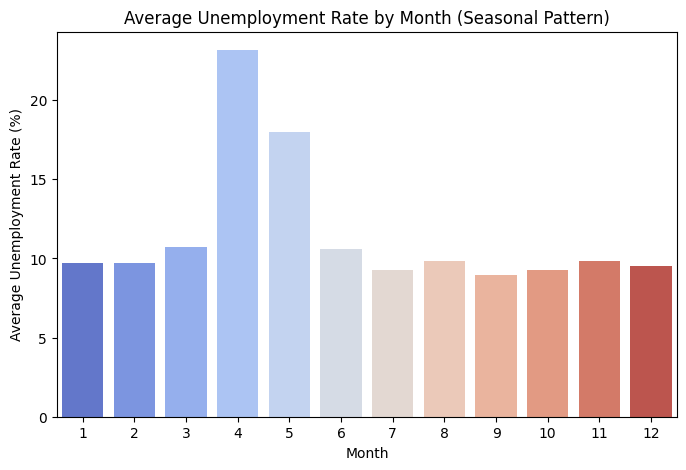

In [12]:
combined['Month'] = combined['Date'].dt.month
month_avg = combined.groupby('Month')['Unemployment_rate'].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=month_avg.index, y=month_avg.values, palette='coolwarm')
plt.title("Average Unemployment Rate by Month (Seasonal Pattern)")
plt.xlabel("Month")
plt.ylabel("Average Unemployment Rate (%)")
plt.show()


Boxplot for monthly variation

C:\Users\3 STAR\AppData\Local\Temp\ipykernel_14976\2747995721.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Unemployment_rate', data=combined, palette='viridis')


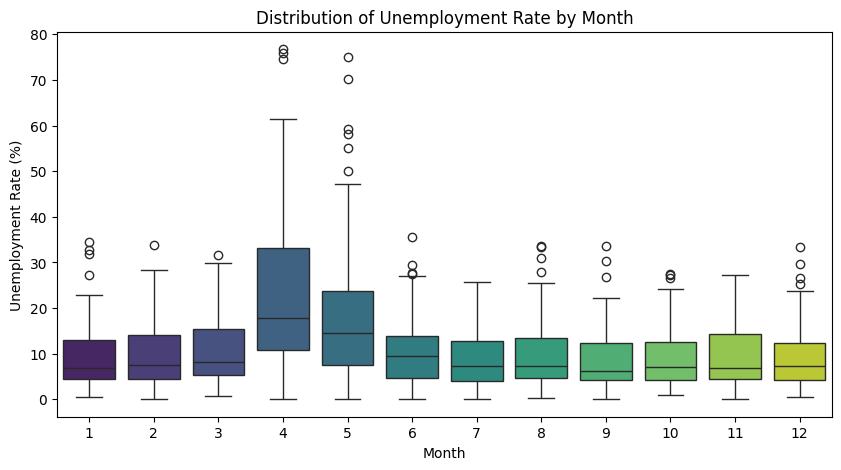

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Month', y='Unemployment_rate', data=combined, palette='viridis')
plt.title("Distribution of Unemployment Rate by Month")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.show()


Key insights summary

In [14]:
print("📊 SUMMARY OF INSIGHTS 📊\n")
print(f"1️⃣ National unemployment increased from {pre_mean:.2f}% to {post_mean:.2f}% after COVID-19.")
print(f"2️⃣ The increase is {change_abs:.2f} points (~{change_pct:.2f}%).")
print("3️⃣ Certain states (e.g., top above) faced sharper unemployment spikes.")
print("4️⃣ A clear seasonal pattern shows unemployment tends to rise mid-year.")
print("5️⃣ These insights can help shape economic and job-support policies.")


📊 SUMMARY OF INSIGHTS 📊

1️⃣ National unemployment increased from 9.48% to 15.31% after COVID-19.
2️⃣ The increase is 5.82 points (~61.37%).
3️⃣ Certain states (e.g., top above) faced sharper unemployment spikes.
4️⃣ A clear seasonal pattern shows unemployment tends to rise mid-year.
5️⃣ These insights can help shape economic and job-support policies.
